# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/yulu_bike_sharing_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [2]:
monthly_counts = df['count'].resample('ME').mean()

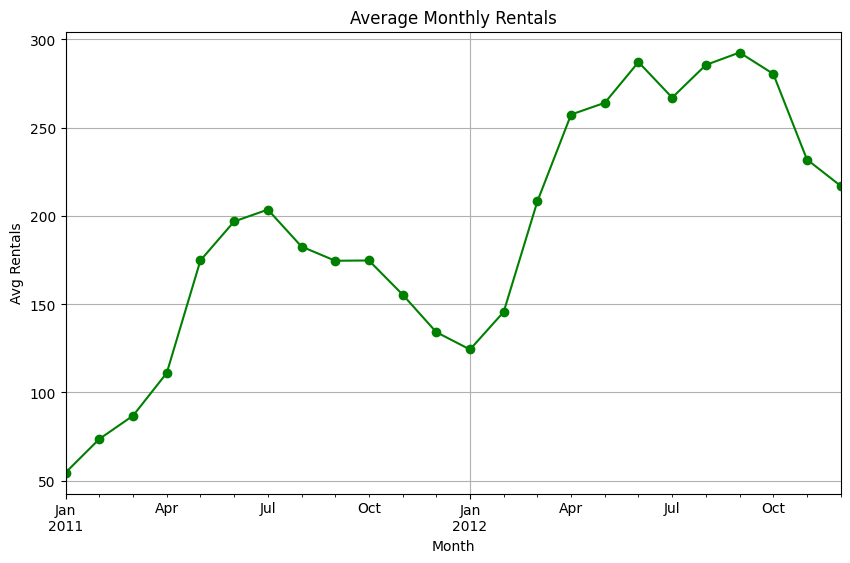

In [3]:
# Detailed viz with Pandas
monthly_counts.plot(
    marker='o',
    color='green',
    figsize=(10, 6),
    title='Average Monthly Rentals',
    xlabel='Month',
    ylabel='Avg Rentals',
    grid=True
);

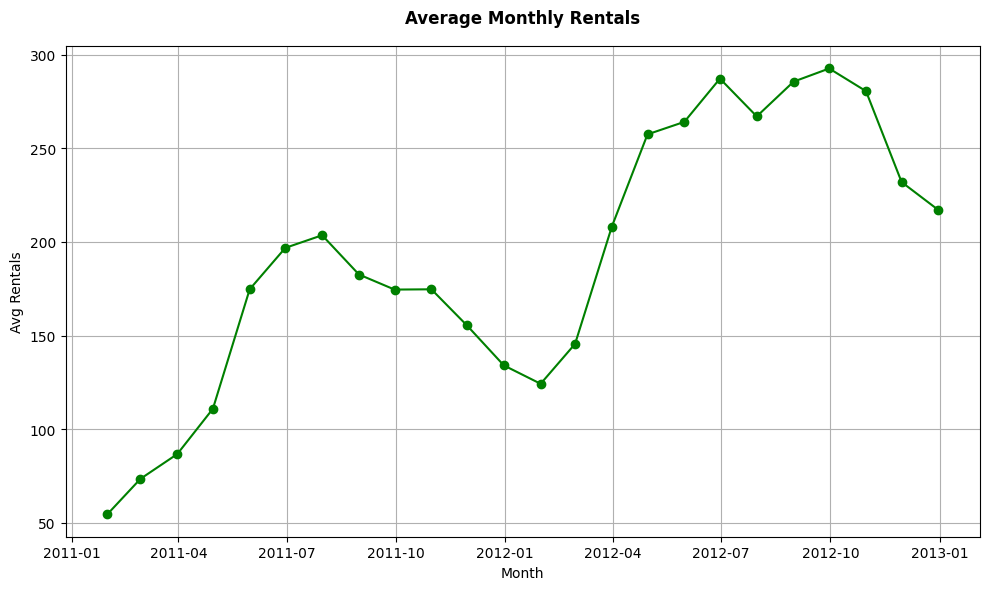

In [4]:
# Detailed viz with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts, 'o-g')
plt.title('Average Monthly Rentals', fontweight='bold', y=1.03)
plt.xlabel('Month')
plt.ylabel('Avg Rentals')
plt.grid(True)
plt.tight_layout()
plt.show()

What are the differences between the two charts:
- The chart created with Pandas is faster to generate, uses less code, and is great for quick exploratory analysis.
- The Matplotlib version provides much more styling flexibility (fonts, colors, layout), making it more suitable for polished reports or presentations.

Which one do I prefer?
- For fast insights — Pandas.
- For publishing or formal reporting — Matplotlib, because it produces more professional-looking visuals.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [5]:
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

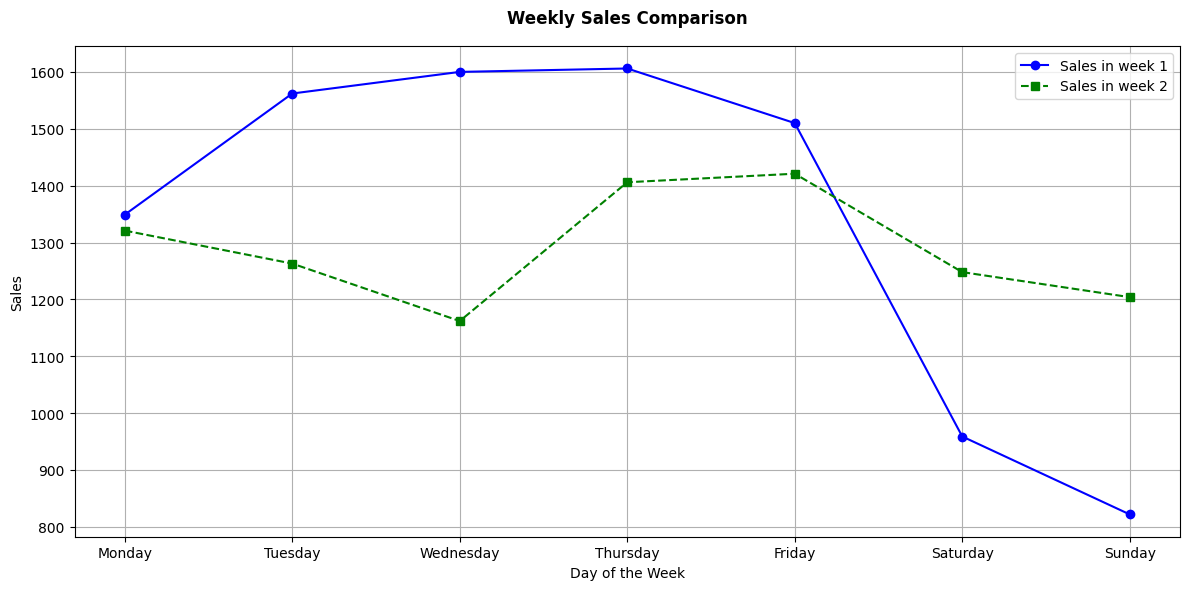

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(days, sales_week1, label='Sales in week 1', color='blue', marker='o', linestyle='-')
plt.plot(days, sales_week2, label='Sales in week 2', color='green', marker='s', linestyle='--')

plt.title('Weekly Sales Comparison', fontweight='bold', y=1.03)
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.legend()

all_days = list(range(1, 8))
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(all_days, days_of_week)

plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
import numpy as np

np.std(sales_week1), np.std(sales_week2)

(np.float64(299.99857142517004), np.float64(90.9060964256355))

1. The chart shows that sales in Week 2 (green line) are more consistent, with no sharp drops or spikes. In contrast, Week 1 (blue line) shows major fluctuations, especially during the weekend (days 6 and 7).

2. This is confirmed mathematically by the standard deviation:
- Week 1: ≈ 299.99
- Week 2: ≈ 90.91

    Lower standard deviation indicates less variation, meaning Week 2 had more stable sales.

- Week 1 peaks around Wednesday–Thursday, then drops sharply.
- Week 2 shows a more balanced and steady pattern.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [8]:
monthly_temp = df['temp'].resample('ME').mean()

In [9]:
season_avg = df.groupby('season')['count'].mean()

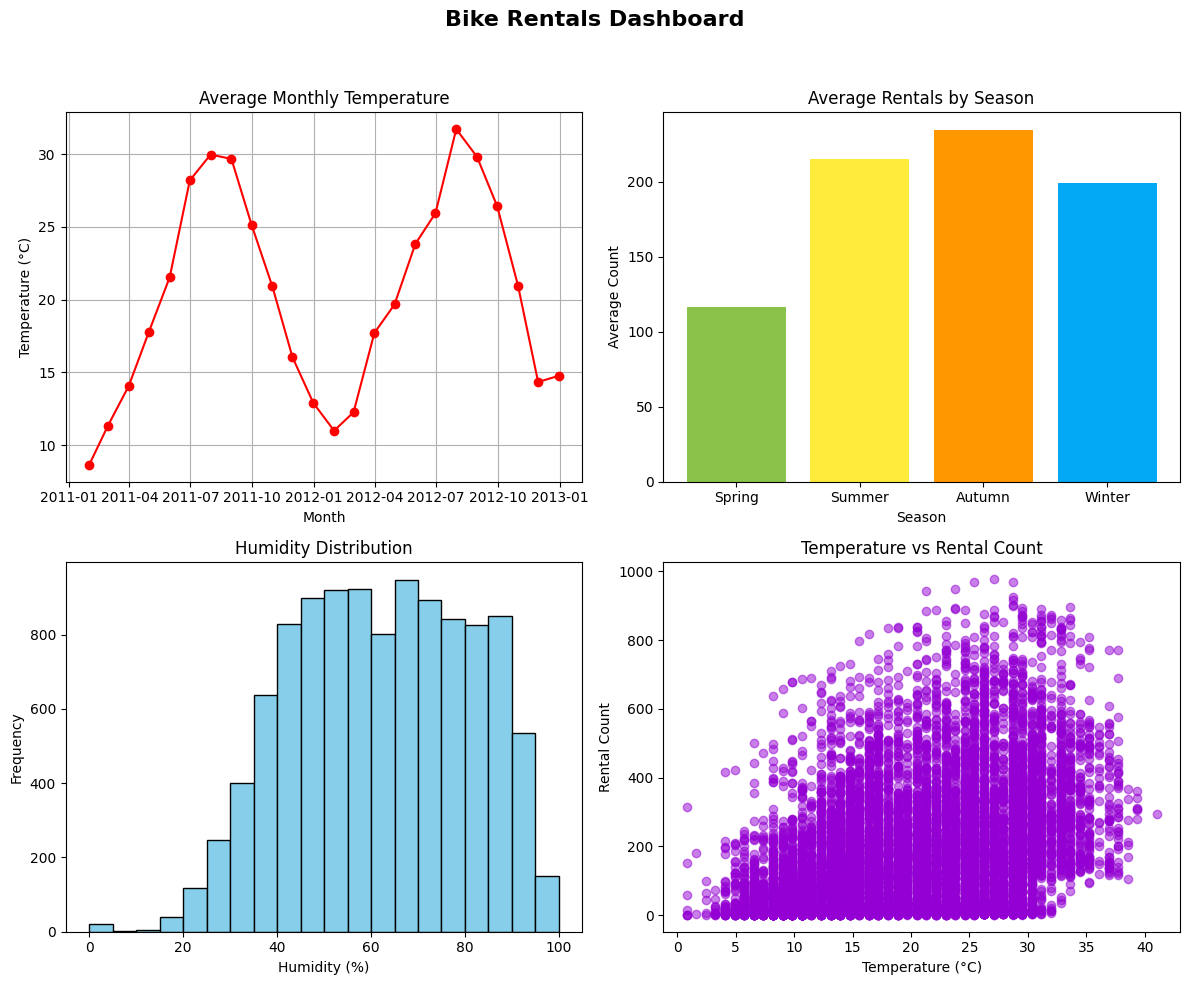

In [12]:
plt.figure(figsize=(12, 10))
plt.suptitle('Bike Rentals Dashboard', fontsize=16, fontweight='bold')

# 1. Line graph of average temperature by month
plt.subplot(2, 2, 1)
plt.plot(monthly_temp.index, monthly_temp.values, color='r', marker='o', linestyle='-')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# 2. Bar chart of average hourly rentals by season
plt.subplot(2, 2, 2)
plt.bar(season_avg.index, season_avg.values, color=['#8BC34A', '#FFEB3B', '#FF9800', '#03A9F4'])
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Count')

all_seasone = list(range(1, 5))
seasone_name = ['Spring', 'Summer', 'Autumn', 'Winter']
plt.xticks(all_seasone, seasone_name)

# 3. Histogram of humidity
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')

# 4. Scatter plot of temperature vs number of rentals
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], alpha=0.5, color='darkviolet')
plt.title('Temperature vs Rental Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rental Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

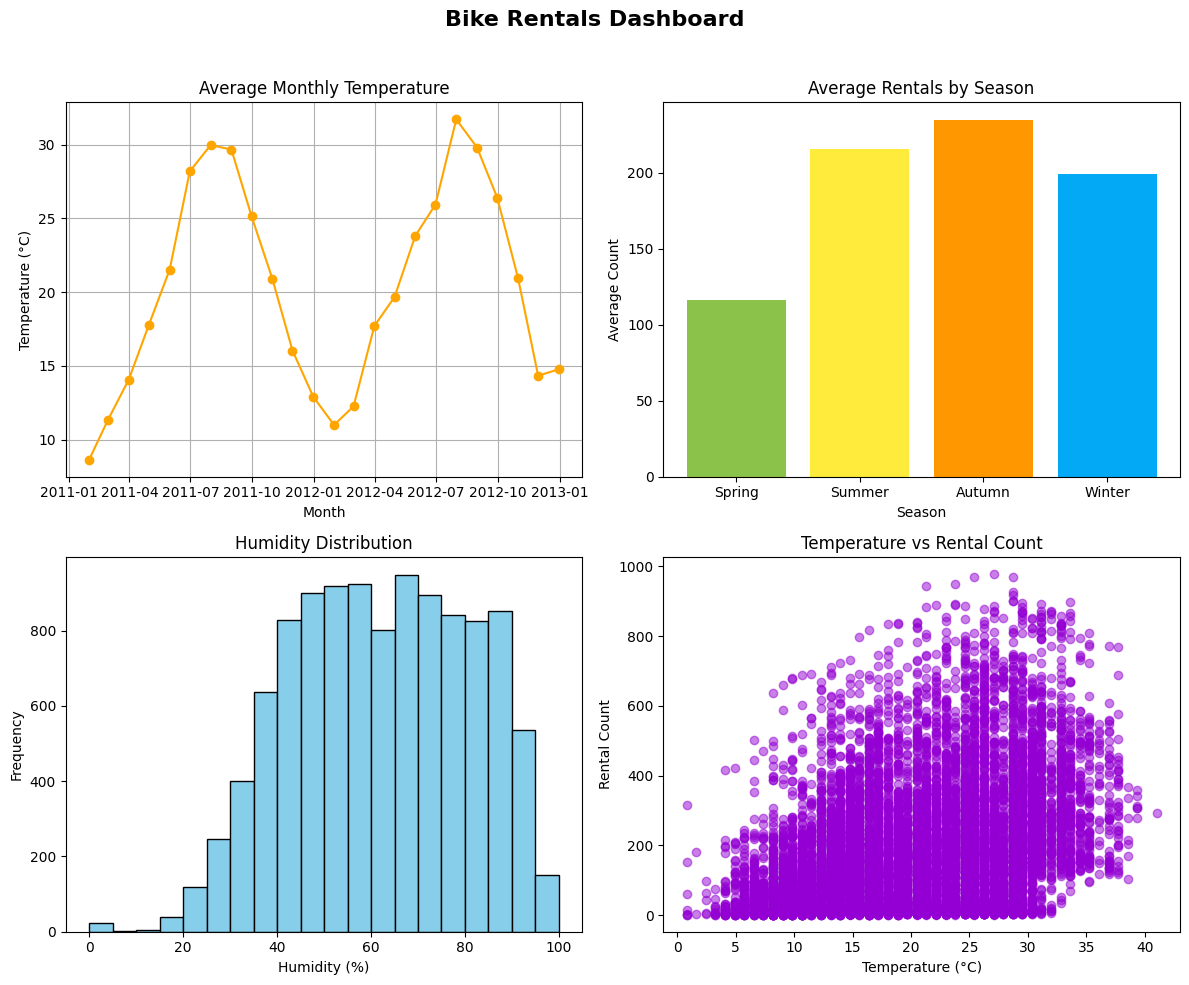

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Bike Rentals Dashboard', fontsize=16, fontweight='bold')

# 1. Line graph of average temperature by month
axs[0, 0].plot(monthly_temp.index, monthly_temp.values, color='orange', marker='o', linestyle='-')
axs[0, 0].set_title('Average Monthly Temperature')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].grid(True)

# 2. Bar chart of average hourly rentals by season
axs[0, 1].bar(season_avg.index, season_avg.values, color=['#8BC34A', '#FFEB3B', '#FF9800', '#03A9F4'])
axs[0, 1].set_title('Average Rentals by Season')
axs[0, 1].set_ylabel('Average Count')
axs[0, 1].set_xlabel('Season')
all_seasone = list(range(1, 5))
seasone_name = ['Spring', 'Summer', 'Autumn', 'Winter']
axs[0, 1].set_xticks(all_seasone, seasone_name)

# 3. Histogram of humidity
axs[1, 0].hist(df['humidity'], bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Humidity Distribution')
axs[1, 0].set_xlabel('Humidity (%)')
axs[1, 0].set_ylabel('Frequency')

# 4. Scatter plot of temperature vs number of rentals
axs[1, 1].scatter(df['temp'], df['count'], alpha=0.5, color='darkviolet')
axs[1, 1].set_title('Temperature vs Rental Count')
axs[1, 1].set_xlabel('Temperature (°C)')
axs[1, 1].set_ylabel('Rental Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**plt.subplot()** creates one subplot per call and makes it active. To create multiple plots, you call it multiple times.

Does not return axis objects, works by activating the subplot for plotting.

Simple for a few plots but less flexible.

**plt.subplots()** creates the whole figure and all subplots at once, returning the figure and axes objects.

Provides direct access to each subplot via objects, which is very convenient for customization and plotting.

Recommended for complex or automated plotting tasks.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

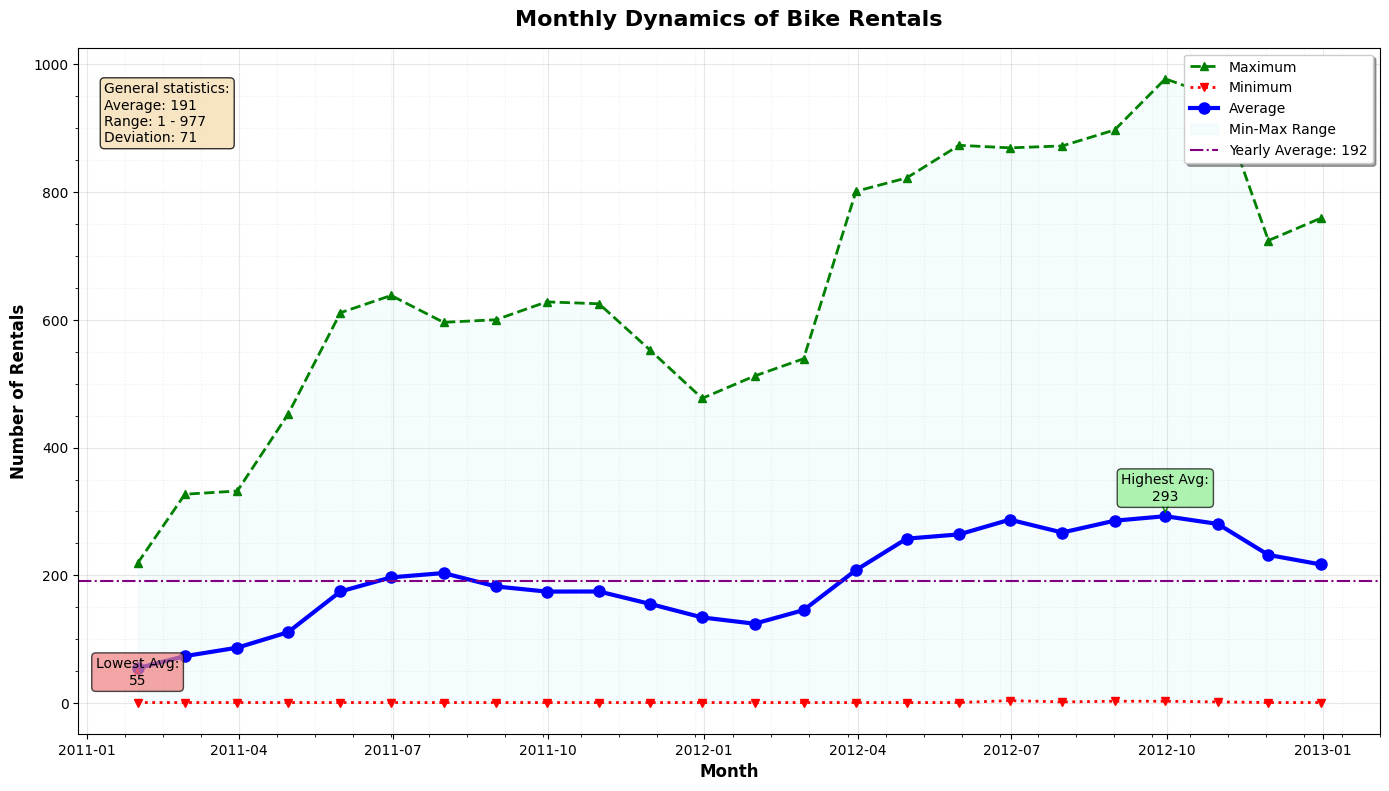

In [15]:
# Group by month: calculate mean, min, and max rentals
monthly = df['count'].resample('ME').agg(['mean', 'min', 'max'])

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for mean, min, and max
ax.plot(monthly.index, monthly['max'], 'g--^', linewidth=2,
        markersize=6, label='Maximum')
ax.plot(monthly.index, monthly['min'], 'r:v', linewidth=2,
        markersize=6, label='Minimum')
ax.plot(monthly.index, monthly['mean'], 'b-o', linewidth=3,
        markersize=8, label='Average')

# Fill the area between min and max
ax.fill_between(monthly.index, monthly['min'], monthly['max'],
                 color='#E0F7FA', alpha=0.3, label='Min-Max Range')

# Horizontal line for annual average
yearly_avg = df['count'].mean()
ax.axhline(y=yearly_avg, color='purple', linestyle='-.', linewidth=1.5,
           label=f'Yearly Average: {yearly_avg:.0f}')

# General statistics
max_month = monthly['mean'].idxmax()
max_value = monthly['mean'].max()
min_month = monthly['mean'].idxmin()
min_value = monthly['mean'].min()

ax.annotate(f'Highest Avg:\n{monthly["mean"].max():.0f}',
            xy=(max_month, monthly['mean'].max()),
            xytext=(max_month, monthly['mean'].max() + 25),
            arrowprops=dict(arrowstyle='->', color='green'),
            bbox=dict(boxstyle="round, pad=0.3", facecolor='lightgreen', alpha=0.7),
            ha='center')

ax.annotate(f'Lowest Avg:\n{monthly["mean"].min():.0f}',
            xy=(min_month, monthly['mean'].min()),
            xytext=(min_month, monthly['mean'].min() - 25),
            arrowprops=dict(arrowstyle='->', color='red'),
            bbox=dict(boxstyle="round, pad=0.3", facecolor='lightcoral', alpha=0.7),
            ha='center')

# Labels and title
plt.title('Monthly Dynamics of Bike Rentals', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Rentals', fontsize=12, fontweight='bold')

# Legend with shadow
plt.legend(loc='upper right', frameon=True, shadow=True, fontsize=10)

# Text block with summary statistics
textstr = '\n'.join((
    'General statistics:',
    f'Average: {monthly["mean"].mean():.0f}',
    f'Range: {monthly["min"].min():.0f} - {monthly["max"].max():.0f}',
    f'Deviation: {monthly["mean"].std():.0f}'
))

ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Rotate x labels and layout
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

plt.tight_layout()
plt.show()

1. Annotations highlight key values (like highest and lowest points), making the graph easier to interpret at a glance. They draw attention to important insights without requiring the viewer to scan all the data.

2. fill_between() visually emphasizes the range between two values, in this case, the minimum and maximum number of rentals. It helps to better understand the variability across months and identify months with high volatility.

3. The text block summarizes key statistics (average, max, min) in one spot, allowing the viewer to quickly grasp the most important numbers without reading the whole graph. It’s especially useful in reports or presentations where clarity and efficiency are vital.